In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_blobs, make_circles
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc
import seaborn as sns

### Linear Separability

In [2]:
X, y = make_blobs(n_samples = 500, n_features = 2, centers = 2, random_state = 10)

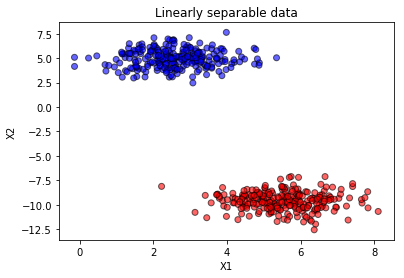

In [3]:
fig = plt.figure()
plt.scatter([x[0] for x in X], [y[1] for y in X], c = y, cmap = ListedColormap(['red', 'blue']), alpha = 0.6,  edgecolors='black');
plt.title('Linearly separable data')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10)

In [5]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [6]:
clf = LogisticRegression(random_state = 10)
clf.fit(X_train, y_train)

LogisticRegression(random_state=10)

#### Parameters
- penalty : Regularization type (l1, l2, elasticnet)
- c : 1 / lambda (regularization)
- fit_intercept : To add beta0
- solver : Optimization method
- max_iter, random_state etc. 

In [7]:
y_pred = clf.predict(X_test)
probs = clf.predict_proba(X_test)
probs = probs[:,1]

In [8]:
def confusionmatrix_heatmap(cmat, labels):
    ax = plt.subplot()
    sns.heatmap(cmat, annot=True, ax = ax);
    
    ax.set_xlabel('Predicted', fontsize=15)
    ax.xaxis.set_label_position('top') 
    ax.xaxis.set_ticklabels(labels, fontsize = 10)
    ax.xaxis.tick_top()
    
    ax.set_ylabel('True', fontsize=15)
    ax.yaxis.set_ticklabels(labels, fontsize = 10)
    plt.show()

In [9]:
def plot_roc(y_test, probs):
    fpr, tpr, threshold = roc_curve(y_test, probs)
    roc_auc = auc(fpr, tpr)

    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

Accuracy Score = 1.0


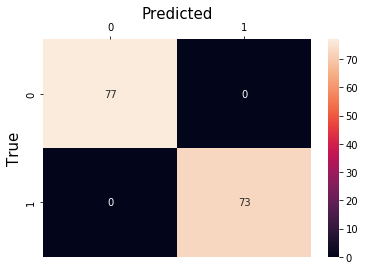

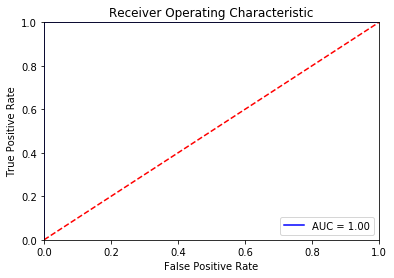

In [10]:
cmat = confusion_matrix(y_true = y_test, y_pred = y_pred)
print(f'Accuracy Score = {accuracy_score(y_test, y_pred)}')
confusionmatrix_heatmap(cmat, np.unique(y_test))
plot_roc(y_test, probs)

In [11]:
def plot_decisionboundary(X, y, clf, scaler, margin = 5):
    inv_X = sc.inverse_transform(X)
    arange_1 = np.arange(start = inv_X[:, 0].min() - margin, stop = inv_X[:, 0].max() + margin, step = 0.1)
    arange_2 = np.arange(start = inv_X[:, 1].min() - margin, stop = inv_X[:, 1].max() + margin, step = 0.1)
    X1, X2 = np.meshgrid(arange_1, arange_2)
    plt.contourf(X1, X2, clf.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
                 cmap = ListedColormap(['tab:red', 'tab:blue']), alpha = 0.3)
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y)):
        plt.scatter(inv_X[y == j, 0], inv_X[y == j, 1], c = ListedColormap(['red', 'blue'])(i), alpha = 0.6,  edgecolors='black', label = j)
    plt.title('Decision Boundary')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


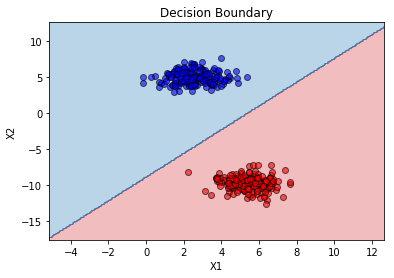

In [12]:
plot_decisionboundary(X_train, y_train, clf, sc)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


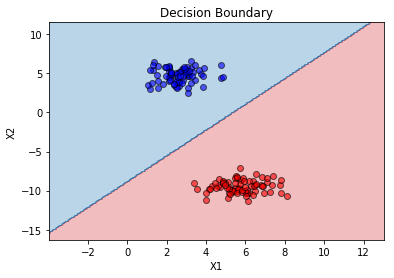

In [13]:
plot_decisionboundary(X_test, y_test, clf, sc)

<hr>

### Non-Linear Separability

In [14]:
X, y = make_circles(n_samples = 500, factor=0.5, noise=0.02)
X = 5 * X

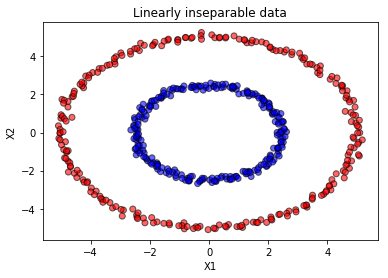

In [15]:
fig = plt.figure()
plt.scatter([x[0] for x in X], [y[1] for y in X], c = y, cmap = ListedColormap(['red', 'blue']), alpha = 0.6,  edgecolors='black');
plt.title('Linearly inseparable data')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10)

In [17]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [18]:
clf = LogisticRegression(random_state = 10)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
probs = clf.predict_proba(X_test)
probs = probs[:,1]

Accuracy Score = 0.58


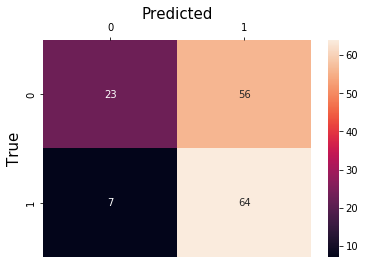

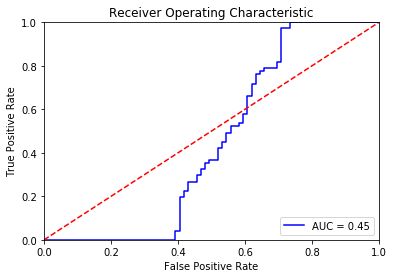

In [19]:
cmat = confusion_matrix(y_true = y_test, y_pred = y_pred)
print(f'Accuracy Score = {accuracy_score(y_test, y_pred)}')
confusionmatrix_heatmap(cmat, np.unique(y_test))
plot_roc(y_test, probs)

Poor accuracy score and AUC (random)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


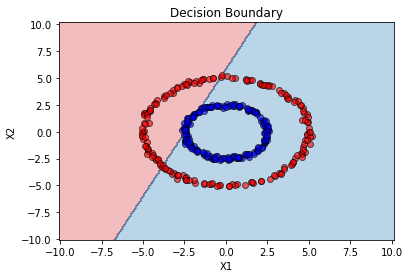

In [20]:
plot_decisionboundary(X_train, y_train, clf, sc)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


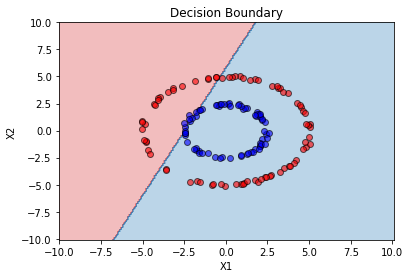

In [21]:
plot_decisionboundary(X_test, y_test, clf, sc)

### Variable transformation

Aforementioned problem can be turned into a linearly separable one by squaring both the variables.

In [22]:
X = X ** 2

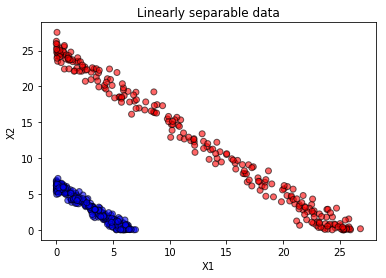

In [23]:
fig = plt.figure()
plt.scatter([x[0] for x in X], [y[1] for y in X], c = y, cmap = ListedColormap(['red', 'blue']), alpha = 0.6,  edgecolors='black');
plt.title('Linearly separable data')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10)

In [25]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [26]:
clf = LogisticRegression(random_state = 10)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
probs = clf.predict_proba(X_test)
probs = probs[:,1]

Accuracy Score = 1.0


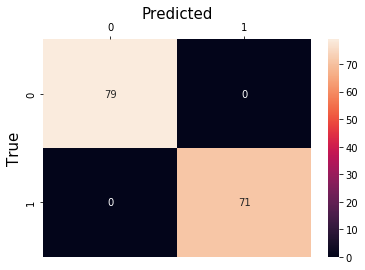

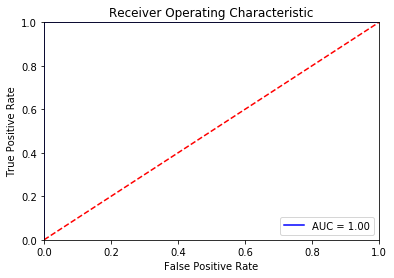

In [27]:
cmat = confusion_matrix(y_true = y_test, y_pred = y_pred)
print(f'Accuracy Score = {accuracy_score(y_test, y_pred)}')
confusionmatrix_heatmap(cmat, np.unique(y_test))
plot_roc(y_test, probs)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


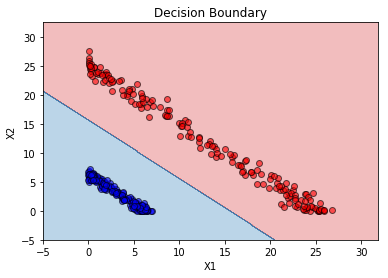

In [28]:
plot_decisionboundary(X_train, y_train, clf, sc)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


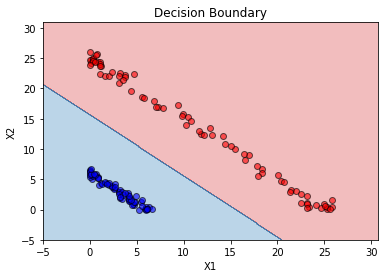

In [29]:
plot_decisionboundary(X_test, y_test, clf, sc)

 Appending squared variable in the existing problem will also work 

<hr>